## **MACHINE INTELLIGENCE (TTC201) COURSEWORK**  🦔

---
Enter your student ID:


In [87]:
student = 'F334796'

Use the next cell to import the necessary files for the coursework:


*   **data.pkl**
*   **util.py**

You should have downloaded these two files in your computer already. After running the cell, click on:image.png and select the files in your computer.

In [88]:
from google.colab import files
files.upload();

Saving data.pkl to data (2).pkl
Saving util.py to util (2).py


Once the files are uploaded, we can import the required libraries to load and plot the data:

In [89]:
import util
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.datasets import make_spd_matrix
# to create a symmetric positive definite covariance matrix
from scipy.stats import multivariate_normal
# having embedded multivariate_normal pdf function

Import the data:

In [90]:
X = util.data_student(student)

You are not required to understand any of the cells above. The coursework activity starts from here with the description of the data.

## **Data description:**
You have available the following data array:

$X$: this is all your data; an array composed of $25,000$ samples with $5$ features each; $X\in\mathbb{R}^{25,000\times 5}$.

There is additional data (not available to you) with the known labels of the data. These will be used to validate your model and to check its accuracy. Therefore, use the taught materials to ensure that you are not overfitting; **i.e., your model will be tested with another dataset (labelled) not available to you.**

**Please also note**:


*   The work will be checked for **plagiarism** with an automated algorithm.
*   The coursework is individual and not group based.
*   It is not likely to happen that any two students land up with the same implementation, due to the many choices in hyperparameter tuning and architecture selection.
*  You can use libraries that have been used in the Seminar and Tutorial notebooks. You are not allowed to use other libraries that have not been taught, such as a Python package of GMM or ANN.
*  The computer labs have specific assigned tasks already and are not meant for solving your coursework.
*  Academics will only answer questions about coursework if you do not understand any of the questions. Academics and assistants will not provide answers on:


1.   How to answer the questions.
2.   Which model to choose.
3.   How to choose the hyperparameters.
4.   How to avoid overfitting.
5.   How to find errors in the code.

These points will be evaluated to determine your marks and are part of the coursework.

We highly recommend that you implement your coursework fully individually, as this will avoid that your implementation is influenced by others and flagged by the system.


The next cell plots the data in 2D. As the data is five dimensional, only the first two variables are plotted. Think that this is only a two dimensional projection of the five dimensional data.

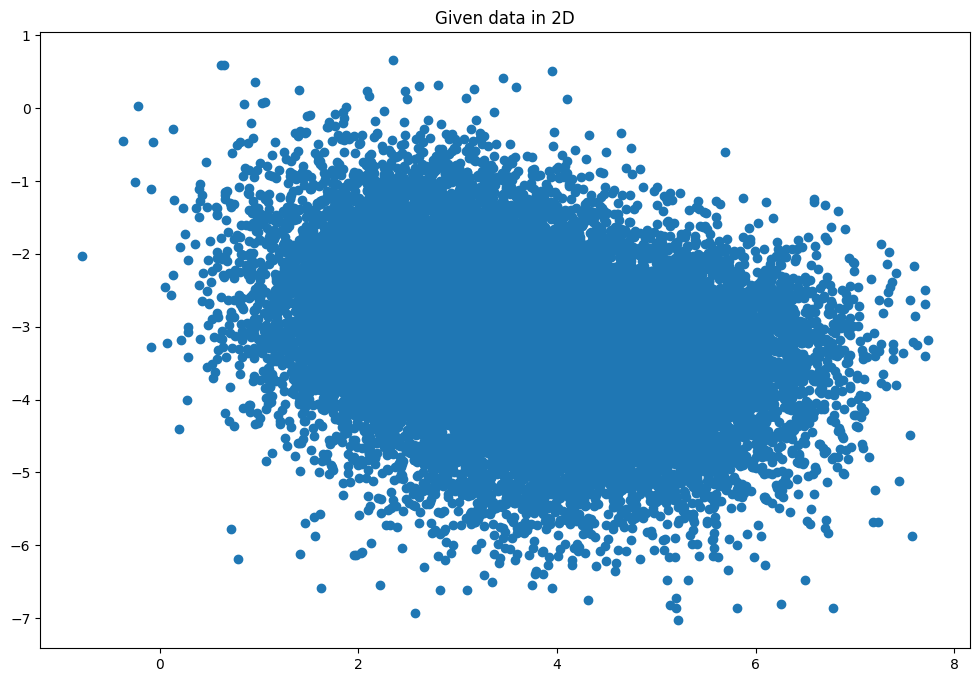

In [91]:
plt.figure(figsize=(12, 8))
plt.title("Given data in 2D")
ax = plt.gca()
sct = ax.scatter(X[:,0], X[:,1])

This data is formed by **5 different clusters**, but we have lost the labels in the data. Your first task is to use clustering to recover the labels.

# **Task 1: Clustering (GMM)**
* Your code follows:
* Please split your code into various cells for clarity

## a. Initialise the cluster centres, covariance matrices and mixing coefficients **[5 marks]**

In [92]:
# define the number of clusters to be learned
k = 5

# initialize the cluster centers
np.random.seed(42)
meanid = np.random.choice(range(X.shape[0]), k)
means = X[meanid]

# initialize the weights (mixing coefficients)
weights = np.ones(k) / k

# initialize symmetric positive definite covariance matrices
cov = []
for i in range(k):
  cov.append(make_spd_matrix(X.shape[1]))
cov = np.array(cov)

print("Initial means:\n", means)
print ("Initial covariances:\n",cov)
print("Initial mixing coefficients:", weights)

Initial means:
 [[ 4.42896864 -4.21155647  3.37422908 -9.18545733  6.39091848]
 [ 2.82998292 -2.05353982  5.85136467 -7.16817292  7.45878779]
 [ 6.75623989 -1.62619604  4.66353086 -7.06704892  7.9242452 ]
 [ 4.45442981 -3.91392379  2.41515197 -5.65465971  7.04627718]
 [ 5.80091183 -4.08390633  2.78305833 -9.85525782  6.84313916]]
Initial covariances:
 [[[ 5.55093858e-01  4.87497600e-02 -1.02939656e-01 -1.07837087e+00
   -9.90087293e-02]
  [ 4.87497600e-02  2.54361847e-01  1.36560698e-01  1.67528746e-01
   -2.62577460e-02]
  [-1.02939656e-01  1.36560698e-01  2.08017775e-01  6.13121293e-01
    1.27757007e-01]
  [-1.07837087e+00  1.67528746e-01  6.13121293e-01  4.67044570e+00
    1.14218936e+00]
  [-9.90087293e-02 -2.62577460e-02  1.27757007e-01  1.14218936e+00
    7.94066370e-01]]

 [[ 2.02374283e-01 -9.31900617e-03  3.64266349e-03 -2.29425808e-02
   -1.26168649e-01]
  [-9.31900617e-03  1.18393589e+00  1.36018686e+00 -2.11206429e-01
   -8.45038245e-01]
  [ 3.64266349e-03  1.36018686e+00 

## b. Implement the Expectation–Maximization (EM) method **[5 marks]**
* note: do not include any plot in this section

In [93]:
colors = ['blue', 'orange', 'tab:green', 'magenta', 'yellow']

# Create a grid for visualization purposes
x1, y1 = np.mgrid[-4:12:.01, -4:12:.01]
position = np.dstack((x1,y1))

# run for 20 iterations
for step in range(20):
## E-M method
  # Expectation step
  likelihood = []
  for j in range(k):
    likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))
  likelihood = np.array(likelihood)
  # print(likelihood.shape)

  gamma = []
  for j in range(k):
    # posterior = likelihood * prior / evidence
    gamma.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)))

  # Maximization step
    # update mean and covariance
    means[j] = np.sum(gamma[j].reshape(len(X),1) * X, axis=0) / (np.sum(gamma[j]))
    cov[j] = (gamma[j].reshape(len(X),1) * (X - means[j])).T.dot(X - means[j]) / (np.sum(gamma[j]))
    # update the weights/mixing coefficients
    weights[j] = np.mean(gamma[j])

## c. Assign labels to the given data according to the learned clusters **[10 marks]**
* identify which data points belong to which cluster
* print how many data points in each cluster

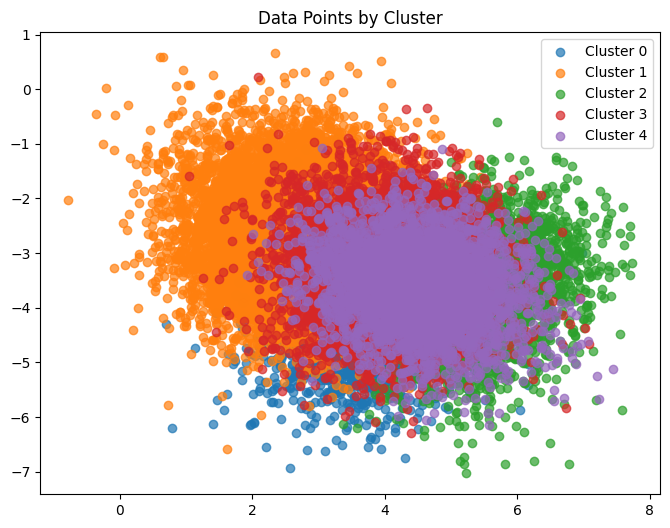

Number of data points in each cluster:
Cluster 0: 2414 data points
Cluster 1: 11478 data points
Cluster 2: 2492 data points
Cluster 3: 5118 data points
Cluster 4: 3498 data points


In [94]:
# Assign each data point to a cluster
Y = np.argmax(gamma, axis=0)

# Count how many data points in each cluster
cluster_counts = np.bincount(Y)

# Plot data according to their cluster number
plt.figure(figsize=(8, 6))
plt.title("Data Points by Cluster")

# Plot data points by cluster
for cluster_num in range(k):
    cluster_data = X[Y == cluster_num]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_num}", alpha=0.7)

plt.legend()
plt.show()

print("Number of data points in each cluster:")
for cluster_num, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_num}: {count} data points")

## d. Visualise the learned clusters of the given data in 2D, i.e., using the first two variables **[10 marks]**.
* demonstrate which data points belong to which cluster
* use legend identifying the cluster numbers
* add a Gaussian contour on each cluster

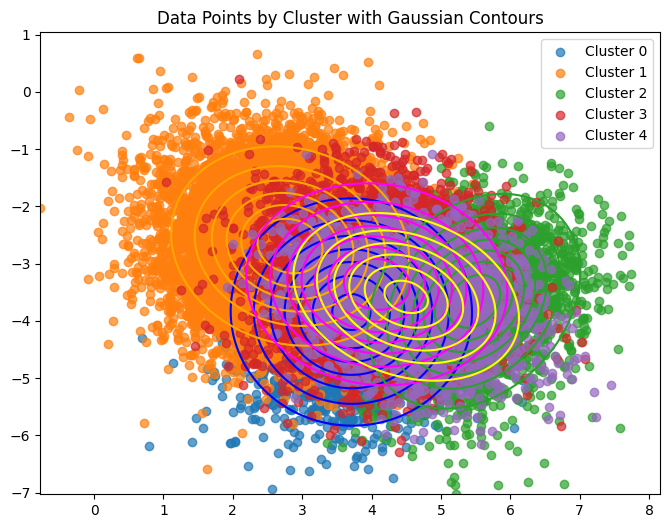

In [95]:
# First two variables for 2D visualization
X_2d = X[:, :2]

plt.figure(figsize=(8, 6))
plt.title("Data Points by Cluster with Gaussian Contours")

for cluster_num in range(k):
    cluster_data = X_2d[Y == cluster_num]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_num}", alpha=0.7)

    # Plot Gaussian contours
    mean = means[cluster_num][:2]
    covariance = cov[cluster_num][:2, :2]
    distribution = multivariate_normal(mean=mean, cov=covariance)

    x, y = np.mgrid[min(X_2d[:, 0]):max(X_2d[:, 0]):.01, min(X_2d[:, 1]):max(X_2d[:, 1]):.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, distribution.pdf(pos), colors=colors[cluster_num])

plt.legend()
plt.show()

Please note:
* Your clusters may look a little garbled in the figure above, this is because we are projecting variables in a five-dimentional space into two dimensions. In the original five-dimensional space (if we could see it), the clustering would appear much more effective.
* The T-SNE algorithm assists in this cases by letting us display high dimensional data in two dimensions.

## e. Use the T-SNE algorithm to better display your clustering results **[10 marks]**

At this stage you should have:

**A vector of labels** $Y$ with the labels $0$ to $4$, indicating which cluster each of the samples in $X$ belongs to: $Y\in\mathbb{R}^{25000\times 1}$ according to your clustering.

The T-SNE is coded for you, your job is only to choose the perplexity parameter so that the clusters are better showcased. You can learn more on the T-SNE algorithm from ([T-SNE scikit](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)). Investigate the perplexity parameter.

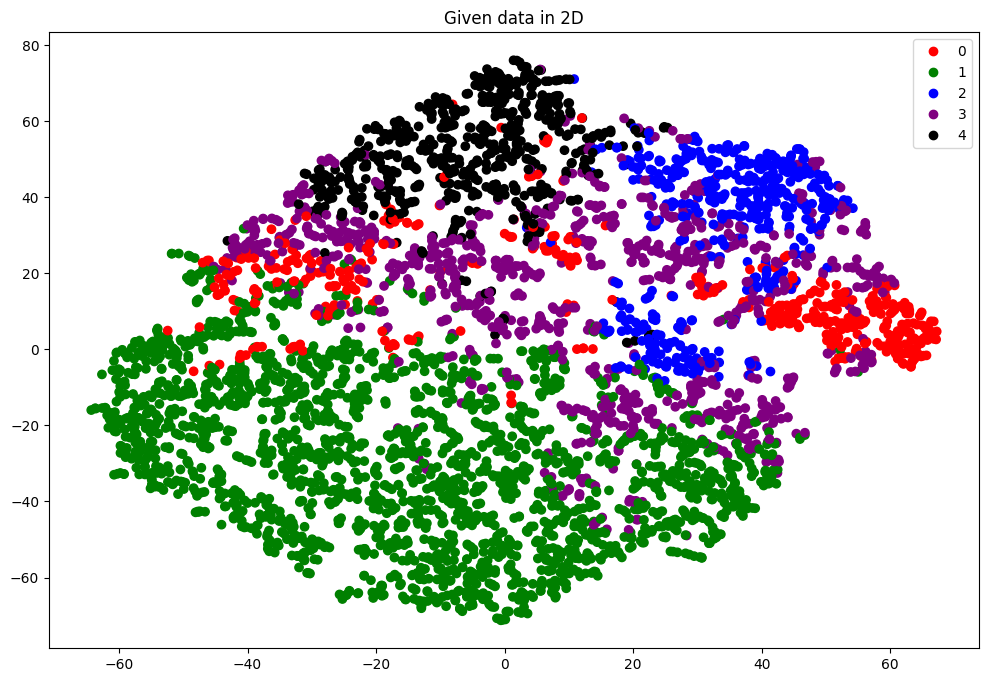

In [96]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X[0:5000,:])

colors = ['red', 'green', 'blue', 'purple', 'black']
plt.figure(figsize=(12, 8))
plt.title("Given data in 2D")
ax = plt.gca()
sct = ax.scatter(X_embedded[:,0], X_embedded[:,1], c=Y[0:5000], cmap=matplotlib.colors.ListedColormap(colors))
ax.legend(handles=sct.legend_elements()[0], labels=['0','1','2','3','4'])


### **Add comments** below explaining in 3 short sentences:
* What is the perplexity parameter in T-SNE? [3]
* Your results and conclusions in all sections of Task 1. [7]

### your comments here:

t-SNE is used to to visualize data of higher dimensions by converting similarities between data points to joint probabilites.
- Perplexity parameter represents the number of effective nearest neighbors It controls the number of close neighbor each point is allowed to consider during optimization. Lower perplexity values lead to more focus on local structure, while higher values allow more global structure.
- It was found, after trial and error that a perlexity number of 35 yielded a satisfactory result. That is the clusters are more clearly illustrated.
- After implementing GMM-Algorithm on the five clusters number of data points for each cluster was determined:

| Cluster    | # of data points |
| -------- | ------- |
| 0  | 2414    |
| 1  | 11478   |
| 2  | 2492    |
| 3  | 5118    |
| 4  | 3498    |

# **Task 2: Classification**

In Task 2, you are going to build a classifier

Your code follows: (please split your codes into various cells)

## a. Normalise the data in $X$ with Gaussian normalisation **[5 marks]**



In [97]:
# Normalise data
X -= np.mean(X,axis=0)
X /= np.std(X,axis=0)

## b. Split your data into training and development sets **[5 marks]**

At the end of this question you should have the following arrays available:
* $X_{train} \in \mathbb{R}^{20,000\times 5}$
* $Y_{train} \in \mathbb{R}^{20,000\times 1}$
* $X_{dev} \in \mathbb{R}^{5,000\times 5}$
* $Y_{dev} \in \mathbb{R}^{5,000\times 1}$

In [98]:
from sklearn.model_selection import train_test_split

# Splitting data into training and development sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_dev shape:", X_dev.shape)
print("Y_dev shape:", Y_dev.shape)


X_train shape: (20000, 5)
Y_train shape: (20000,)
X_dev shape: (5000, 5)
Y_dev shape: (5000,)


## c. Implement a classification algorithm that is able to predict which cluster each sample *belongs to* **[30 marks]**

* You can choose among any of the algorithms studied in the course.
* Monitor and plot the loss in both training and development sets so that you can adjust hyperparameters.
* Play with the hyperparameters and select them to yield the maximum performance.
* This question will be marked according to the performance (using the test data set not available to you).

In [99]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [100]:
X_train = torch.tensor(X_train).float()
Y_train = torch.tensor(Y_train)
X_dev = torch.tensor(X_dev).float()
Y_dev = torch.tensor(Y_dev)

train_DS = TensorDataset(X_train, Y_train)
dev_DS = TensorDataset(X_dev, Y_dev)

In [101]:
class MLP_classification(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(MLP_classification, self).__init__()

    self.linear_1 = torch.nn.Linear(in_features=input_dim, out_features=hidden_dim, bias=True)
    self.relu = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=hidden_dim, out_features=output_dim, bias=True)

  def forward(self, x):

    z_1 = self.linear_1(x)
    a_1 = self.relu(z_1)
    z_2 = self.linear_2(a_1)

    return z_2

In [102]:
torch.manual_seed(42) # Set random seed for reproducibility
classifier_1 = MLP_classification(5,20,5)

In [103]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(classifier_1.parameters(),lr=0.001)
trainLoader = DataLoader(dataset=train_DS, batch_size=10)
n_epoch = 200

In [104]:
L = []
L_dev = []

for epoch in range(n_epoch): #number of passes through the entire dataset
  L_batch = []
  for x_batch, y_batch in trainLoader: #each of the batches of the entire data
    output = classifier_1(x_batch)  #calculate output of the model for the given batch
    loss = criterion(output,y_batch) #calculate the error
    L_batch.append(loss.item())
    optimizer.zero_grad() #initialize gradients
    loss.backward() #backpropagate the error
    optimizer.step() #update one step of gradient descent
  L.append(np.mean(L_batch))

  output = classifier_1(X_dev)
  loss_dev = criterion(output,Y_dev)
  L_dev.append(loss_dev.item())

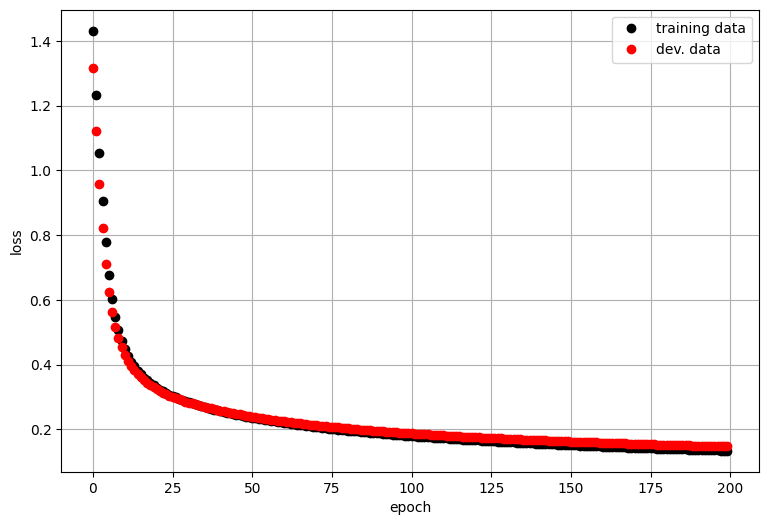

Accuracy in dev set: 95.14%


In [105]:
plt.figure(figsize=(9,6))
plt.plot(L,'ko')
plt.plot(L_dev, 'ro')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training data','dev. data'])
plt.grid()
plt.show()

output = classifier_1(X_dev)
prediction = torch.softmax(output,dim=1).detach().numpy().argmax(axis=1)
ground_truth = np.array(Y_dev)

accuracy = np.sum(ground_truth == prediction)/np.size(prediction)
print("Accuracy in dev set: {}%".format(accuracy*100))

### **Provide code instructions** bwlow, given test data `X_test`, `Y_test`, how to compute and print the accuracy value of the test data using the developed ANN model from the previous cell.

## d. Perform error analysis on the data: **[10 marks]**



*   Find precision and recall
*   Find F-scores
*   Average those values for each of the classes and summarise results in a table



In [106]:
from sklearn.metrics import precision_recall_fscore_support
from tabulate import tabulate

# Calculate precision, recall, and F-score for each cluster
precision, recall, fscore, _ = precision_recall_fscore_support(ground_truth, prediction, average=None)

print(tabulate({'Cluster': ['0', '1', '2', '3', '4'], 'Precision': precision, 'Recall': recall, 'F-score': fscore}, headers = 'keys'))

# Calculate the average precision, recall, and F-score for all classes (clusters)
average_precision = precision.mean()
average_recall = recall.mean()
average_fscore = fscore.mean()

print("Average Precision: {:.2f}".format(average_precision))
print("Average Recall: {:.2f}".format(average_recall))
print("Average F-score: {:.2f}".format(average_fscore))

  Cluster    Precision    Recall    F-score
---------  -----------  --------  ---------
        0     0.89002   0.89002    0.89002
        1     0.983809  0.984648   0.984228
        2     0.942553  0.936575   0.939555
        3     0.904137  0.888008   0.896
        4     0.958631  0.985337   0.9718
Average Precision: 0.94
Average Recall: 0.94
Average F-score: 0.94


## e. Comment on your results **[10 marks]**
* In about five short sentences, discuss your hyperparameter tuning and results.

### your answers here:


1.   Number of epochs was decreased from 200 to 100 with batch size 20, since it increased accuracy, mean prediction, recall and F-Score.
2.   Increasing batch size to 30 resulted in worse accuracy and precision, recall and F-score. Decreasing to 10 increased the accuracy and the loss of development data in the plot was still decreasing after 100 epochs, so algorithm was also run for 200 epochs. This slightly increased the accuracy. Number of epochs was then increased to 500. However this resulted in worse accuracy and the loss in dev. had stopped to decrease. Therefore 200 epochs was deemed as the best value.
3.   When increasing the learning rate from 0.005 to 0.01 slightly decreased the accuracy and the loss in dev. started to increase. Decreasing it to 0.001 produced better accuracy.
4. Number of neurons in the hidden layer was also tuned. When increasing it from 30 to 60 decreased the accuracy. Decreasing number of neurons to 20 also descreased the accuracy, so a value of 30 was kept.

In summary the best accuracy achieved was around 0.95 with the following values for the hyperparameters:

| Hyperparam.    | value |
| -------- | ------- |
| # of hidden neurons  | 30    |
| Learning rate  | 0.001   |
| Batch size  | 10    |
| # number of batches  | 200    |
| Perplexity  | 30    |



# **SUBMISSION**

For sumission, the following two files are required:


*   This notebook with your solutions and answers: rename it to coursework_ID.ipynb, where ID is your student ID.
*   A pdf printout of the notebook after executing all the cells. It is advisible to restart the kernel before running all the cells then (File -> Print -> save as pdf) with the same naming convention.

